In [163]:
import matplotlib.pyplot as plt
import numpy as np
from math import e
from matplotlib.pyplot import figure



In [222]:
sigmaT = 6.6e-25 #cm^2
m_e = .510/1000 #MeV, to GeV
ep = np.logspace(-20, 0, num = 1000) #
hbarc = 1.97e-5 #cm eV
c = 2.998e10 #cm/s

def kelvintoGeV(K):
    return 8.617e-14*K #Kelvin to GeV

def temp(n, gev = False):
    if n == 0:
        if gev == True:
            return(kelvintoGeV(2.7))
        return 2.7 #K
    if n == 1:
        if gev == True:
            return(kelvintoGeV(20))
        return 20
    if n == 2:
        if gev == True:
            return(kelvintoGeV(5000))
        return 5000
        
def en_den(n):
    if n == 0:
        return 0.260 #eV/cm^3
    if n == 1:
        return 0.3 
    if n == 2:
        return 0.3
    
def dEedt(Ee):
    #Ee in GeV
    en_loss = 0
    for i in range(0, 3):
        en_loss += (4/3)*sigmaT*en_den(i)*S(i, Ee)*(Ee/m_e)**2
    
    en_loss += (4/3)*sigmaT*0.224**(Ee/m_e)**2 #in cm^2
    
    return en_loss/1e9*2.9981e10 #in GeV/s, this is times c


def blackbody(E, n):
    return 1/np.pi**2*(E**2/(e**(E/temp(n, gev = True))-1))/(1.97e-14)**3 #units of cm^-3 GeV^-1

def ep_c(ep):
    
    #ep is in GeV
    dndep = 0
    

    cstar = en_den(2)/(np.trapz(ep*blackbody(ep, 2), x = ep)*(1e9))
    cir = en_den(1)/(np.trapz(ep*blackbody(ep, 1), x = ep)*(1e9))
    ccmb = en_den(0)/(np.trapz(ep*blackbody(ep, 0), x = ep)*(1e9))
    return ccmb, cir, cstar 

def le(Ee, deltaEe):
    l = deltaEe*c/dEedt(Ee) #in cm
    return l

def A(Ee, deltaEe, ep, egammas):
    initarr = sigmaICS(ep, egammas, Ee)*dndepsilon(ep)
    integral = np.where(initarr<0, 0, initarr)
    norm = dEedt(Ee)/np.trapz(egammas*integral, x = ep)/c #should be unitless
    
    return norm #so no units
    
        

def dndepsilon(ep):
    
    cs = np.array(ep_c(ep))
    star = cs[2]*blackbody(ep, 2)
    ir = cs[1]*blackbody(ep, 1)
    cmb = cs[0]*blackbody(ep, 0)
    
    #return star, ir, cmb
    return star+ir+cmb #cm^-3/GeV
    

def S(n, Ee):
    #n = 0 is CMB, 1 is IR, 2 is starlight
    Si = (45*m_e**2/(64*np.pi**2*temp(n)**2))/((45*m_e**2/(64*np.pi**2*temp(n)**2))+(Ee**2/m_e**2))
    return Si

def fICS(Ee):
    return 1

def total(Ee, deltaEe, ep, egammas):
    initarr = sigmaICS(ep, egammas, Ee)*dndepsilon(ep)
    integral = np.where(initarr<0, 0, initarr)
    fin = A(Ee, deltaEe, ep, egammas)*fICS(Ee)*le(Ee, deltaEe)*np.trapz(integral, x = ep)
    return np.nan_to_num(fin, copy=False, nan=0, posinf=0, neginf=0) #units of per GeV
    

def sigmaICS(ep, Egam, Ee):
    
    #choose Ee to be 1 TeV
    
    z = Egam/Ee
    beta = 4*ep*Ee/(m_e**2)
    
    sigma = 3*sigmaT*m_e**2/(4*ep*Ee**2)*(1+(z**2/(2*(1-z)))+(z/(beta*(1-z)))-(2*z**2/(beta**2*(1-z)))-(z**3)/(2*beta*(1-z)**2)+(2*z/(beta*(1-z)))*np.log(beta*(1-z)/z))
    return sigma #units of cm^2/GeV I think


In [78]:
egammas = np.logspace(2, 5, num = 1000) #100 GeV to 100 TeV


def dNdEgam(Ee = 1e5, step = 0.01):
    #100 TeV
    Eshold = []

    dNdE = []
    tot = []
    Ees = []
    deltaEs = []

    while Ee > 1e2: #100 GeV
        Eshold.append(Ee)
        Ees.append(Ee)
        print(Ee)
        deltaEe = Ee*step
        deltaEs.append(deltaEe)
        for egamma in egammas:
            dNdE.append(total(Ee, deltaEe, ep, egamma)) #units of per GeV

        #print(np.trapz(dNdE, x = egammas))
        tot.append(dNdE)
        dNdE = []
        Ee = Ee-deltaEe
        #Eshold = []
    return tot, tot[0], Ees, deltaEs

def getA(arr, Ee = 1e5, step = 0.01):
    return step*Ee/(np.trapz(egammas*arr, x = egammas))

def getdNdEgamfin(Eehere = 1e5, stephere = 0.01):
    array, array0, elecs, deltaEs = dNdEgam(Ee = Eehere, step = stephere)
    const = getA(array0, Ee = Eehere, step = stephere)
    print(const)
    
    return np.array(array)*const, elecs, deltaEs #units of per GeV
    
    

In [79]:
normarr, elec_energies, deltaE = getdNdEgamfin(Eehere = 1e5, stephere = 0.01)


100000.0


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in power
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in true_divide
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in subtract
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log


99000.0


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in log


98010.0
97029.9
96059.601
95099.00499
94148.0149401
93206.53479069899
92274.469442792
91351.72474836408
90438.20750088044
89533.82542587163
88638.48717161291
87752.10229989678
86874.58127689782
86005.83546412885
85145.77710948756
84294.31933839268
83451.37614500876
82616.86238355868
81790.69375972309
80972.78682212585
80163.05895390459
79361.42836436555
78567.8140807219
77782.13593991469
77004.31458051554
76234.27143471038
75471.92872036327
74717.20943315963
73970.03733882803
73230.33696543975
72498.03359578535
71773.0532598275
71055.32272722923
70344.76949995694
69641.32180495736
68944.90858690778
68255.4595010387
67572.90490602831
66897.17585696802
66228.20409839835
65565.92205741437
64910.26283684022
64261.16020847182
63618.5486063871
62982.36312032323
62352.53948912
61729.0140942288
61111.72395328651
60500.606713753645
59895.600646616105
59296.64464014994
58703.67819374844
58116.64141181095
57535.47499769284
56960.12024771592
56390.519045238754
55826.61385478637
55268.3477162385
54

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars


41712.08799332205
41294.967113388826
40882.01744225494
40473.19726783239
40068.46529515406
39667.780642202524
39271.1028357805
38878.39180742269
38489.60788934846
38104.71181045497
37723.66469235042
37346.42804542692
36972.96376497265
36603.234127322925
36237.20178604969
35874.82976818919
35516.0814705073
35160.92065580223
34809.311449244204
34461.218334751764
34116.606151404245
33775.4400898902
33437.6856889913
33103.30883210139
32772.27574378038
32444.552986342576
32120.10745647915
31798.906381914356
31480.917318095213
31166.108144914262
30854.44706346512
30545.90259283047
30240.443566902166
29938.039131233145
29638.658739920815
29342.272152521607
29048.84943099639
28758.360936686426
28470.77732731956
28186.069554046364
27904.2088585059
27625.16676992084
27348.915102221632
27075.425951199417
26804.67169168742
26536.624974770548
26271.258725022843
26008.546137772613
25748.460676394887
25490.97606963094
25236.06630893463
24983.705645845286
24733.868589386835
24486.529903492967
24241.66

471.5836293460191
466.8677930525589
462.19911512203333
457.577123970813
453.0013527311049
448.47133920379383
443.9866258117559
439.54675955363837
435.151291958102
430.79977903852097
426.49178124813574
422.22686343565437
418.0045948012978
413.8245488532848
409.68630336475195
405.5894403311044
401.53354592779334
397.5182104685154
393.5430283638303
389.60759808019196
385.71152209939004
381.85440687839616
378.0358628096122
374.2555041815161
370.51294913970094
366.8078196483039
363.13974145182084
359.5083440373026
355.9132605969296
352.3541279909603
348.8305867110507
345.3422808439402
341.8888580355008
338.46996945514576
335.0852697605943
331.73441706298837
328.4170728923585
325.1329021634349
321.8815731418005
318.6627574103825
315.47612983627863
312.3213685379158
309.1981548525367
306.1061733040113
303.0451115709712
300.0146604552615
297.01451385070885
294.0443687122018
291.1039250250798
288.192885774829
285.3109569170807
282.45784734790993
279.6332688744308
276.8369361856865
274.068566823

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars


128.9730064258184
127.68327636156022
126.40644359794462
125.14237916196517
123.89095537034551
122.65204581664206
121.42552535847564
120.21127010489089
119.00915740384198
117.81906582980356
116.64087517150553
115.47446641979047
114.31972175559257
113.17652453803665
112.04475929265628
110.92431169972971
109.81506858273242
108.7169178969051
107.62974871793605
106.55345123075669
105.48791671844913
104.43303755126463
103.38870717575199
102.35482010399447
101.33127190295453
100.31795918392498
1.0044652592174177e-05


In [82]:
print(normarr)

print(elec_energies)
print(deltaE)

[[1.00446526e-04 9.97543671e-05 9.90669779e-05 ... 1.01845285e-07
  1.01143487e-07 0.00000000e+00]
 [9.94420607e-05 9.87568235e-05 9.80763081e-05 ... 1.00826832e-07
  0.00000000e+00 0.00000000e+00]
 [9.84476401e-05 9.77692552e-05 9.70955450e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.02811861e-07 1.02103403e-07 1.01399827e-07 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.01783742e-07 1.01082369e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00765905e-07 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[100000.0, 99000.0, 98010.0, 97029.9, 96059.601, 95099.00499, 94148.0149401, 93206.53479069899, 92274.469442792, 91351.72474836408, 90438.20750088044, 89533.82542587163, 88638.48717161291, 87752.10229989678, 86874.58127689782, 86005.83546412885, 85145.77710948756, 84294.31933839268, 83451.37614500876, 82616.86238355868, 81790.69375972309, 80972.78682212585, 80163.05895390459, 79361.42836436555, 78

In [81]:
#consider many electrons of different energies
#Ees = np.logspace(2, 5, num = 1000)

def dNedEe(elec_en, alpha = 1.5, Ecut = 30*1e3, A = 1):
    #alpha 1.5
    #Ecut is 30 TeV, or 30,000 GeV
    #A = 1 temp
    
    elec_spec = A*elec_en**(-alpha)*np.exp(-elec_en/Ecut)
    
    return elec_spec #units of GeV?







print(dNedEe(np.array(elec_energies), alpha = 1.5, Ecut = 30*1e3, A = 1))

[1.12811072e-09 1.18406466e-09 1.24237969e-09 1.30313663e-09
 1.36641832e-09 1.43230971e-09 1.50089785e-09 1.57227195e-09
 1.64652338e-09 1.72374575e-09 1.80403489e-09 1.88748892e-09
 1.97420828e-09 2.06429572e-09 2.15785639e-09 2.25499784e-09
 2.35583005e-09 2.46046550e-09 2.56901914e-09 2.68160849e-09
 2.79835363e-09 2.91937726e-09 3.04480469e-09 3.17476394e-09
 3.30938574e-09 3.44880353e-09 3.59315358e-09 3.74257494e-09
 3.89720951e-09 4.05720211e-09 4.22270045e-09 4.39385522e-09
 4.57082009e-09 4.75375178e-09 4.94281007e-09 5.13815786e-09
 5.33996117e-09 5.54838925e-09 5.76361453e-09 5.98581272e-09
 6.21516286e-09 6.45184729e-09 6.69605176e-09 6.94796544e-09
 7.20778097e-09 7.47569449e-09 7.75190570e-09 8.03661789e-09
 8.33003800e-09 8.63237664e-09 8.94384815e-09 9.26467064e-09
 9.59506606e-09 9.93526021e-09 1.02854828e-08 1.06459675e-08
 1.10169520e-08 1.13986780e-08 1.17913915e-08 1.21953424e-08
 1.26107849e-08 1.30379776e-08 1.34771832e-08 1.39286690e-08
 1.43927066e-08 1.486957

(array([1.e-17, 1.e-15, 1.e-13, 1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03,
        1.e-01, 1.e+01, 1.e+03]),
 <a list of 11 Text yticklabel objects>)

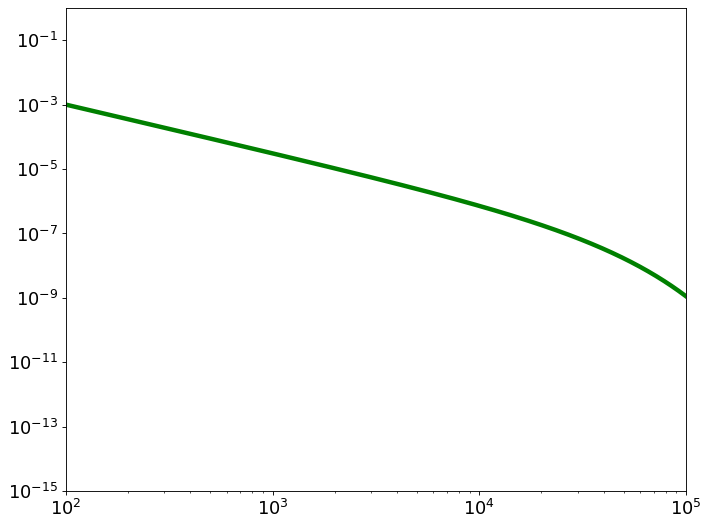

In [83]:
figure(figsize=(10, 8), dpi=80)
#plt.plot(egammas, np.sum(tot, axis = 0),  linewidth = 4, color = 'green')
plt.plot(elec_energies, dNedEe(np.array(elec_energies), alpha = 1.5, Ecut = 30*1e3, A = 1), linewidth = 4, color = 'green')

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-15, 1e0)
plt.xlim(1e2, 1e5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [84]:
def dNgamdEgam(egammas, elec_energies, deltaEe):
    arrayhere = []
    for egam in egammas:
        dNdEtemp = []
        print(egam)
        for i in range (0, len(elec_energies)):
            elec_en = elec_energies[i]
            #print(elec_en)
            dNdEtemp.append(dNedEe(elec_en, alpha = 1.5, Ecut = 30*1e3, A = 1)*total(elec_en, deltaEe[i], ep, egam))
        arrayhere.append(np.trapz(dNdEtemp, x = elec_energies))
        
    return arrayhere
    

In [85]:
dNgamdEgamma = dNgamdEgam(egammas, elec_energies, deltaE)

100.0


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in power


100.69386314760271


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in log


101.39254075588153
102.09606623060465
102.80447320933098
103.51779556301763
104.23606739764011


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in double_scalars


104.95932305582276
105.6875971184804
106.42092440647247
107.15933998226711
107.90287915161836
108.65157746525384
109.40547072057424
110.16459496336569
110.92898648952227
111.69868184678226
112.47371783647519
113.25413151528114
114.03996019700331
114.83124145435112
115.62801312073753
116.43031329208767
117.23818032865985
118.05165285688055
118.87076977119033
119.69557023590428
120.52609368708426
121.36237983442405
122.20446866314887
123.05240043592616
123.90621569479157
124.76595526308698
125.63166024741201
126.50337203959037
127.38113231864784
128.264983052806
129.1549665014884
130.05112521734085


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars


130.95350204826676
131.86214013947486
132.7770829355429
133.69837418249466
134.62605792989098
135.5601785329369
136.50078065460139
137.44790926775366
138.40160965731314
139.3619274224142
140.32890847858732
141.30259905995337
142.2830457214352
143.2702953409831
144.26439512181574
145.26539259467813
146.273335620113
147.28827239075017
148.31025143361043
149.33932161242518
150.37553212997383
151.4189325304352
152.46957270175744
153.52750287804227
154.5927736419477
155.66543592710622
156.7455410205595
157.8331405652118
158.92828656229779
160.03103137387
161.14142772530198
162.25952870780873
163.3853877809862
164.51905877536623
165.66059589499136
166.81005372000593
167.96748720926533
169.13295170296487
170.30650292528443
171.48819698705393
172.6780903884356
173.87624002162505
175.08270317357253
176.29753752872057
177.52080117176342
178.75255259042353
179.99285067824763
181.24175473742378
182.49932448161525
183.76562003881705
185.0407019542302
186.324631193156
187.61746914391213
188.91927762

2860.595535175742
2880.4441533962977
2900.4304938639916
2920.555512182745
2940.8201705870606
2961.2254379880346
2981.7722900196736
3002.4617090855495
3023.2946844057765
3044.272212064303
3065.3952950565267
3086.6649433372745
3108.082173869064
3129.6480106707504
3151.363484866479
3173.229634734976
3195.2475057592137
3217.4181506763716
3239.7426295281953
3262.2220097116697
3284.8573660300435
3307.6497807442424
3330.6003436245887
3353.7101520029287
3376.9803108250912
3400.411932703706
3424.0061379714257
3447.764054734464
3471.6868189265597
3495.775574363275
3520.031472796679
3544.455673970436
3569.0493456752297
3593.813663804626
3618.7498124112803
3643.8589837635445
3669.142378402494
3694.6012051993025
3720.236681413066
3746.050032748993
3772.0424934169973
3798.215306190736
3824.5697224669993
3851.107002325569
3877.828414589457
3904.73523688556
3931.82875570577
3959.1102664684586
3986.581073580439
4014.242490499322
4042.09583979631
4070.1424532194387
4098.383671757261
4126.820845702951
41

63358.04992658241
63797.668086062826
64240.33659394191
64686.07661546321
65134.909462728094
65586.85659571421
66041.93962330306
66500.18030431119
66961.60054853215
67426.22241778349
67894.06812696099
68365.16004510238
68839.52069645496
69317.172761554
69798.13907830667
70282.44264308338
70770.10661181889
71261.15430111745
71755.6091893692
72253.49491787222
72754.83529196218
73259.6542821523
73767.97602527731
74279.8248256491
74795.2251562183
75314.2016597436
75836.7791499719
76362.98261282242
76892.83720758306
77426.36826811278
77963.60130405221
78504.56200204509
79049.2762269642
79597.77002314977
80150.06961565414
80706.20141149491
81266.19200091946
81830.0681586739
82397.85684528512
82969.58520834915
83545.28058382854
84124.97049736118
84708.68266557403
85296.44499741016
85888.28559546258
86484.23275731709
87084.31497690723
87688.56094587427
88296.99955494083
88909.65989529167
89526.57125996401
90147.76314524918
90773.26525210224
91403.10748756223
92037.3199661823
92675.93301146883
9

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in true_divide
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in subtract
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: divide by zero encountered in log


In [86]:
print((-1*np.array(dNgamdEgamma)))

[ 2.83977259e-02  2.81970354e-02  2.79927902e-02  2.77998969e-02
  2.75984758e-02  2.73984616e-02  2.71998445e-02  2.70124153e-02
  2.68165449e-02  2.66220428e-02  2.64385952e-02  2.62467830e-02
  2.60563111e-02  2.58767618e-02  2.56889242e-02  2.55023994e-02
  2.53266670e-02  2.51427220e-02  2.49600628e-02  2.47880675e-02
  2.46079349e-02  2.44290615e-02  2.42514387e-02  2.40843264e-02
  2.39091608e-02  2.37352200e-02  2.35716649e-02  2.34001306e-02
  2.32297958e-02  2.30697235e-02  2.29017456e-02  2.27349425e-02
  2.25782802e-02  2.24137853e-02  2.22504410e-02  2.20971173e-02
  2.19360335e-02  2.17760768e-02  2.16172392e-02  2.14682788e-02
  2.13116396e-02  2.11560966e-02  2.10103138e-02  2.08569237e-02
  2.07046073e-02  2.05619356e-02  2.04117276e-02  2.02625711e-02
  2.01229454e-02  1.99758538e-02  1.98297921e-02  1.96931486e-02
  1.95491091e-02  1.94060783e-02  1.92723545e-02  1.91313041e-02
  1.89912416e-02  1.88521602e-02  1.87222534e-02  1.85850980e-02
  1.84489035e-02  1.83217

(array([1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02]),
 <a list of 7 Text yticklabel objects>)

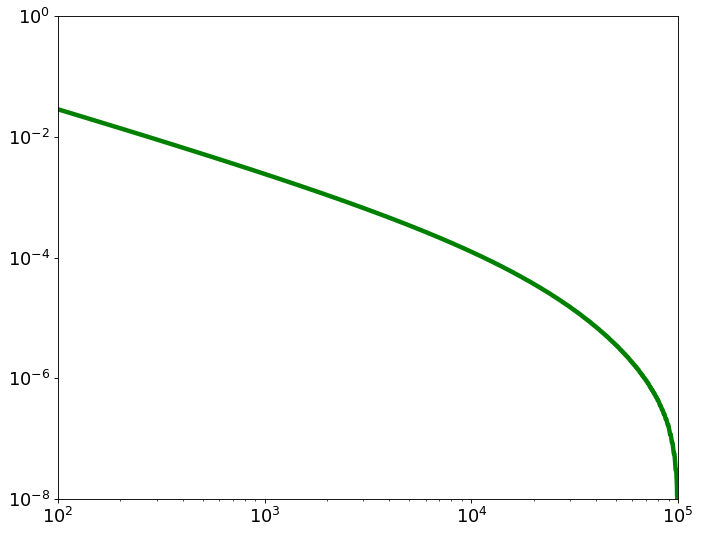

In [87]:
figure(figsize=(10, 8), dpi=80)
#plt.plot(egammas, np.sum(tot, axis = 0),  linewidth = 4, color = 'green')
plt.plot(egammas, -1*np.array(dNgamdEgamma), linewidth = 4, color = 'green')

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-8, 1e0)
plt.xlim(1e2, 1e5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.xlabel(r'$E_{\gamma}$(GeV)', fontsize=25)
#plt.ylabel(r'$\Sigma\frac{dN_{\gamma}}{dE_{\gamma}}$ (GeV$^{-1}$)', fontsize = 25)

Text(0, 0.5, '$\\Sigma\\frac{dN_{\\gamma}}{dE_{\\gamma}}$ (GeV$^{-1}$)')

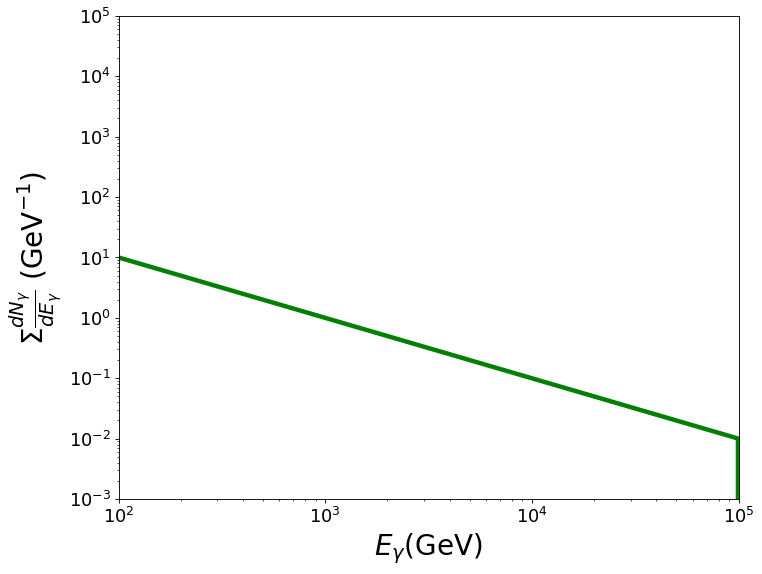

In [260]:
figure(figsize=(10, 8), dpi=80)
#plt.plot(egammas, np.sum(tot, axis = 0),  linewidth = 4, color = 'green')
plt.plot(egammas, tot[0], linewidth = 4, color = 'green')

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-3, 1e5)
plt.xlim(1e2, 1e5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$E_{\gamma}$(GeV)', fontsize=25)
plt.ylabel(r'$\Sigma\frac{dN_{\gamma}}{dE_{\gamma}}$ (GeV$^{-1}$)', fontsize = 25)


2
2


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in power


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

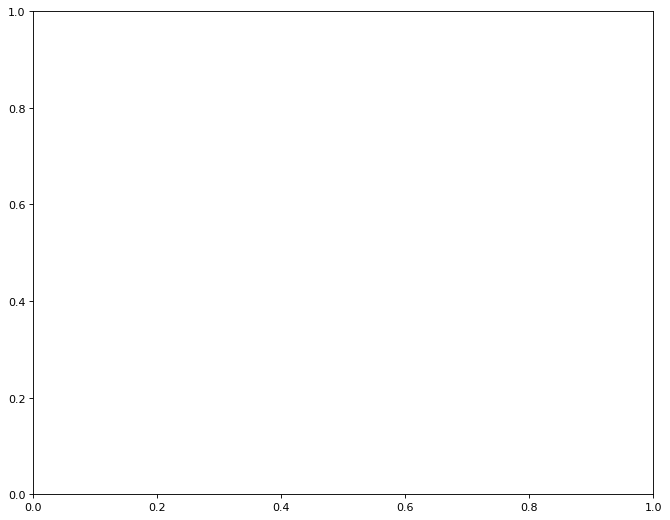

In [138]:
Ee = 1e3 #1 TeV
deltaEe = 0.01*Ee

egamma = 1e0 #10 GeV


vals = A(Ee, deltaEe, ep, egamma)*fICS(Ee)*le(Ee, deltaEe)

#initarr = sigmaICS(ep, egamma, Ee)*dndepsilon(ep)
initarr = dndepsilon(ep)

star = np.where(initarr[0]<0, 0, initarr[0])
ir = np.where(initarr[1]<0, 0, initarr[1])
cmb = np.where(initarr[2]<0, 0, initarr[2])



figure(figsize=(10, 8), dpi=80)
plt.plot(ep, cmb, label = 'CMB', ls = '--', linewidth = 4)
plt.plot(ep, ir, label = 'IR', ls = '-.', linewidth = 4)
plt.plot(ep, star, label = 'Stars', linewidth = 4)
plt.legend(fontsize=25)

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e1, 1e20)
plt.xlim(1e-20, 1e-0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\epsilon$(GeV)', fontsize=25)
plt.ylabel(r'$\frac{dn}{d\epsilon}$(GeV$^{-1}$ cm$^{-3}$)', fontsize=25)
#plt.savefig('./testimages/CMB_IR_stars.pdf')
plt.close()



/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: invalid value encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, '$\\frac{d\\sigma}{dE_{\\gamma}}E_{\\gamma}$(GeV)')

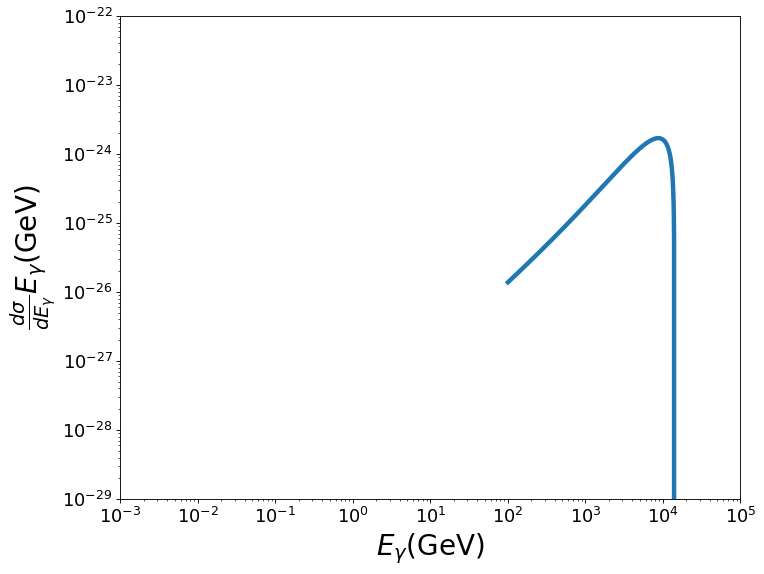

In [162]:
ep = 1e-13 #1 GeV
egammas = np.logspace(2, 5, num = 1000) #100 GeV to 100 TeV
Ee = 1e5 #10 TeV
deltaEe = 0.01*Ee

plt.close()
arr2 = []
for egamma in egammas:
    arr2.append(sigmaICS(ep, egamma, Ee))
    
    
figure(figsize=(10, 8), dpi=80)
plt.plot(egammas, arr2*egammas, linewidth = 4)

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-29, 1e-22)
plt.xlim(1e-3, 1e5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$E_{\gamma}$(GeV)', fontsize=25)
plt.ylabel(r'$\frac{d\sigma}{dE_{\gamma}}E_{\gamma}$(GeV)', fontsize=25)


5.866555440267618e-39


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in power
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in subtract
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in log
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in log


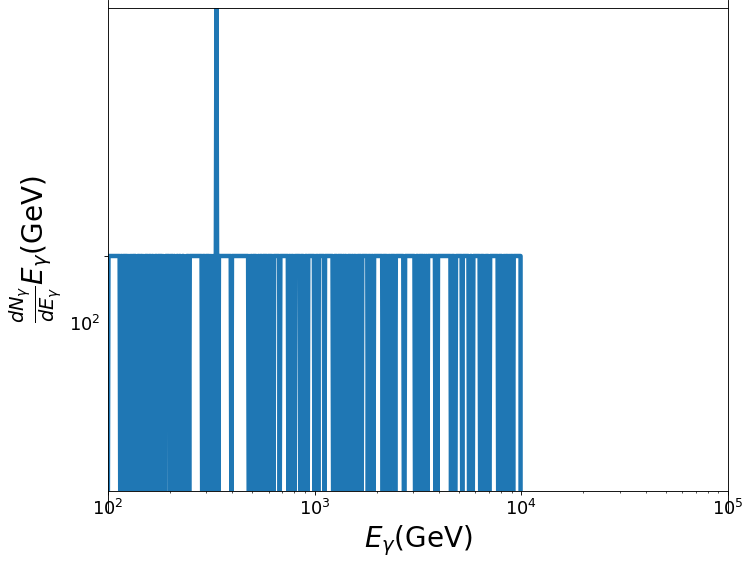

In [143]:
plt.close()
Ee = 1e4 #10 TeV
deltaEe = 0.01*Ee

egammas = np.logspace(2, 5, num = 1000) #100 GeV to 100 TeV

dNdE = []

print(dEedt(Ee))

for egamma in egammas:
    dNdE.append(total(Ee, deltaEe, ep, egamma)) #units of per GeV
    
figure(figsize=(10, 8), dpi=80)
plt.plot(egammas, dNdE*egammas, linewidth = 4)

plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e1, 1e20)
plt.xlim(1e2, 1e5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$E_{\gamma}$(GeV)', fontsize=25)
plt.ylabel(r'$\frac{dN_{\gamma}}{dE_{\gamma}}E_{\gamma}$(GeV)', fontsize=25)
plt.savefig('./testimages/CMB_IR_stars.pdf')
    
    

In [108]:
print(dNdE)

[1.4586269545490386e+72, 1.4496713263247637e+72, 1.4406576193504014e+72, 1.4314810044730679e+72, 1.4221319695202994e+72, 1.4128255721257148e+72, 1.4034292748770092e+72, 1.3938471311832316e+72, 1.38406840141589e+72, 1.3743809550294238e+72, 1.3645560435995333e+72, 1.3545194602384382e+72, 1.344259302366604e+72, 1.334162735763514e+72, 1.3238597137016465e+72, 1.313316634689121e+72, 1.302568000921096e+72, 1.2919932036682291e+72, 1.281161492595949e+72, 1.2700593191827826e+72, 1.2588258023231599e+72, 1.2477048456982694e+72, 1.2362958961902343e+72, 1.2245847930673592e+72, 1.2128658552220336e+72, 1.2011566232581639e+72, 1.1891275254891227e+72, 1.1767641728164087e+72, 1.1645832902466645e+72, 1.1522521709287447e+72, 1.13956935901104e+72, 1.1265390161383538e+72, 1.1139327598085982e+72, 1.1009579227462072e+72, 1.0876004012980743e+72, 1.0741720577030847e+72, 1.0609448489632032e+72, 1.0473184963500932e+72, 1.0332799389414706e+72, 1.0195799850149786e+72, 1.00573742202124e+72, 9.914663873984216e+71, 9.7

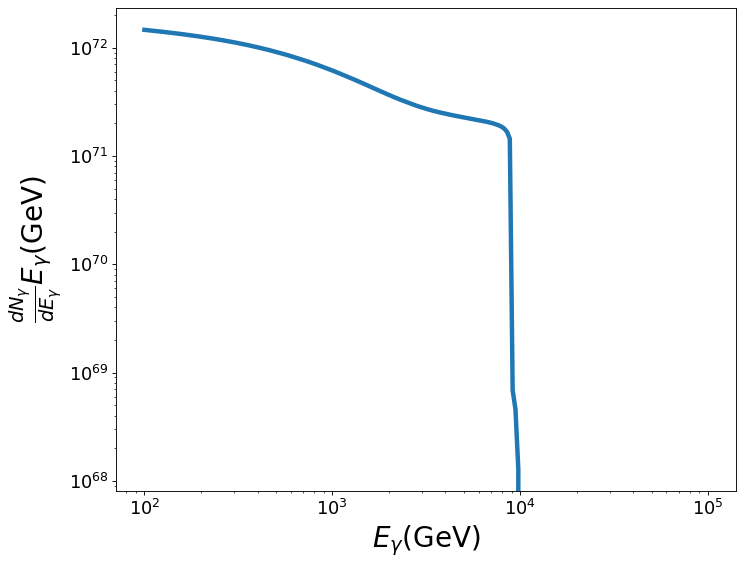

In [252]:
Ee = 1e3 #1 TeV
deltaEe = 0.01*Ee

egamma = 1e1 #10 GeV

arrtest = []
energies = []
while Ee > 1e0:
    print(Ee)
    energies.append(Ee)
    arrtest.append(total(Ee, deltaEe, ep, egamma))
    Ee = Ee - deltaEe
    deltaEe = Ee*0.01



1000.0
990.0
980.1
970.299
960.59601
950.9900499
941.4801494010001
932.06534790699
922.7446944279202
913.517247483641
904.3820750088046
895.3382542587166
886.3848717161294
877.5210229989681
868.7458127689785
860.0583546412887
851.4577710948759
842.9431933839271
834.5137614500878
826.1686238355869
817.906937597231
809.7278682212587
801.6305895390461
793.6142836436557
785.678140807219
777.8213593991469
770.0431458051554
762.3427143471039
754.7192872036328
747.1720943315964
739.7003733882805
732.3033696543977
724.9803359578536
717.7305325982751
710.5532272722924
703.4476949995694
696.4132180495737
689.449085869078
682.5545950103872
675.7290490602833
668.9717585696804
662.2820409839836
655.6592205741438
649.1026283684023
642.6116020847182
636.185486063871
629.8236312032324
623.5253948912
617.290140942288
611.117239532865
605.0060671375364
598.956006466161
592.9664464014994
587.0367819374844
581.1664141181096
575.3547499769286
569.6012024771593
563.9051904523877
558.2661385478639
552.683477

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in power


157.35328210778985
155.77974928671196
154.22195179384485
152.67973227590642
151.15293495314737
149.64140560361588
148.1449915475797
146.66354163210391
145.1969062157829
143.74493715362507
142.30748778208883
140.88441290426795
139.47556877522527
138.08081308747302
136.7000049565983
135.33300490703232
133.97967485796198
132.63987810938235
131.31347932828854
130.00034453500564
128.70034108965558
127.41333767875902
126.13920430197143
124.87781225895172
123.62903413636221
122.39274379499858
121.1688163570486
119.95712819347811
118.75755691154333
117.5699813424279
116.39428152900362
115.23033871371358
114.07803532657644
112.93725497331067
111.80788242357757
110.68980359934179
109.58290556334836
108.48707650771487
107.40220574263773
106.32818368521136
105.26490184835924
104.21225282987565
103.17013030157689
102.13842899856112
101.11704470857552
100.10587426148976
99.10481551887486
98.11376736368611
97.13262969004924
96.16130339314876
95.19969035921727
94.2476934556251
93.30521652106884
92.372

/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in double_scalars
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in log


4.575771239708123
4.530013527311042
4.484713392037932
4.4398662581175525
4.395467595536377
4.351512919581013
4.307997790385203
4.264917812481351
4.222268634356538
4.180045948012972
4.138245488532842
4.096863033647514
4.055894403311039
4.015335459277929
3.9751821046851497
3.935430283638298
3.896075980801915
3.857115220993896
3.818544068783957
3.7803586280961174
3.742555041815156
3.7051294913970043
3.6680781964830342
3.631397414518204
3.595083440373022
3.5591326059692916
3.523541279909599
3.488305867110503
3.453422808439398
3.418888580355004
3.384699694551454
3.3508526976059394
3.31734417062988
3.284170728923581
3.251329021634345
3.2188157314180015
3.1866275741038215
3.154761298362783
3.1232136853791554
3.091981548525364
3.0610617330401104
3.030451115709709
3.000146604552612
2.970145138507086
2.940443687122015
2.911039250250795
2.881928857748287
2.853109569170804
2.824578473479096
2.796332688744305
2.768369361856862
2.7406856682382936
2.7132788115559108
2.686146023440352
2.65928456320594

In [253]:
print(egamma**2)

100.0


Text(0.5, 0, 'E')

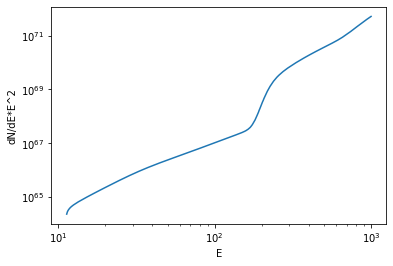

In [255]:
plt.plot(energies, np.array(arrtest)*egamma**2)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('dN/dE*E^2')
plt.xlabel('E')



1.030351865534855
--------------
2.3267838676318514e-13


/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in power
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in power
/Users/ckeith/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in power


Text(0.5, 0, 'GeV')

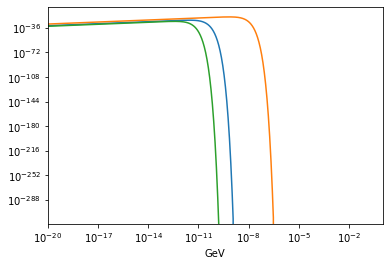

In [147]:
dndepsilon(ep)
print(temp(0, gev = True))
plt.plot(ep, blackbody(ep, 1))
plt.plot(ep, blackbody(ep, 2))
plt.plot(ep, blackbody(ep, 0))
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e-20, 1e0)
plt.xlabel('GeV')


### print(e)

In [18]:
electron_energies = np.logspace(np.log10(980), np.log10(990), num = 100)
print(dEedt(10))


6.094568986898217e-34


In [8]:
egammas = np.logspace(2, 5, num = 400) #in GeV, from 100 GeV to 100 TeV